In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("/kaggle/input/melbourn/Melbourne_housing_FULL.csv")
df2 = pd.read_csv("/kaggle/input/melbourn/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df1.shape

(34857, 21)

In [5]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [6]:
df2.shape

(63023, 13)

In [7]:
df = df1.merge(df2,how = 'outer')

In [8]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
66035,Pascoe Vale,6 Kitchener Rd,3,t,826000.0,S,Nelson,23/12/2017,8.5,3044.0,...,NaN,NaN,NaN,NaN,NaN,Moreland City Council,NaN,NaN,Northern Metropolitan,7485.0
76137,Bentleigh,12A Hutchinson St,3,t,1185000.0,S,Jellis,30/12/2017,11.4,3204.0,...,NaN,NaN,NaN,NaN,NaN,Glen Eira City Council,NaN,NaN,Southern Metropolitan,6795.0
35875,Prahran,11/297 Dandenong Rd,2,u,512500.0,S,Marshall,1/09/2018,4.6,3181.0,...,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,7717.0
11358,Hawthorn East,3/39 Mayston St,2,u,887000.0,S,Marshall,10/09/2016,7.5,3123.0,...,2.0,2.0,0.0,NaN,2001.0,Boroondara City Council,-37.8267,145.0538,Southern Metropolitan,6482.0
4728,Glen Iris,4 Allison Av,4,h,NaN,S,Jellis,28/08/2016,9.2,3146.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,10412.0


In [9]:
df.shape

(76883, 21)

### Data Cleaning 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76883 entries, 0 to 76882
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         76883 non-null  object 
 1   Address        76883 non-null  object 
 2   Rooms          76883 non-null  int64  
 3   Type           76883 non-null  object 
 4   Price          59226 non-null  float64
 5   Method         76883 non-null  object 
 6   SellerG        76883 non-null  object 
 7   Date           76883 non-null  object 
 8   Distance       76882 non-null  float64
 9   Postcode       76882 non-null  float64
 10  Bedroom2       26642 non-null  float64
 11  Bathroom       26633 non-null  float64
 12  Car            26131 non-null  float64
 13  Landsize       23049 non-null  float64
 14  BuildingArea   13744 non-null  float64
 15  YearBuilt      15553 non-null  float64
 16  CouncilArea    76880 non-null  object 
 17  Lattitude      26883 non-null  float64
 18  Longti

In [11]:
df.isnull().mean()*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            22.966065
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.001301
Postcode          0.001301
Bedroom2         65.347346
Bathroom         65.359052
Car              66.011992
Landsize         70.020681
BuildingArea     82.123486
YearBuilt        79.770560
CouncilArea       0.003902
Lattitude        65.033883
Longtitude       65.033883
Regionname        0.003902
Propertycount     0.003902
dtype: float64

    There are many columans which have more than 65% of null values so we will drop those column because if we will impute some value in that it will missguide the model

In [12]:
# Removing unnecesary columns from data

df.drop(["Bedroom2", "Bathroom", "Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude"],axis = 1,inplace = True)

In [13]:
df.shape

(76883, 13)

In [14]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
51062,South Morang,11 Tintern Tce,3,t,430000.0,S,Ray,13/05/2017,20.5,3752.0,Whittlesea City Council,Northern Metropolitan,7969.0
39872,Bentleigh East,13a Clements St,2,t,837000.0,S,Buxton,5/05/2018,13.8,3165.0,Glen Eira City Council,Southern Metropolitan,10969.0
17360,Thomastown,18 Plane St,3,h,630000.0,SP,YPA,27/05/2017,15.3,3074.0,Whittlesea City Council,Northern Metropolitan,7955.0
58771,Moonee Ponds,54b Salisbury St,3,t,842500.0,S,Jellis,18/06/2016,6.2,3039.0,Moonee Valley City Council,Western Metropolitan,6232.0
25188,Malvern East,13 Epping St,5,h,3501000.0,S,Marshall,21/10/2017,8.4,3145.0,Stonnington City Council,Southern Metropolitan,8801.0


In [15]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            17657
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [16]:
# dropping rows with null values

df = df.dropna(subset=['Distance', 'Postcode','CouncilArea','Regionname','Propertycount'])

In [17]:
# filling null values with mean of values in the price column

mean=df['Price'].mean()
df['Price'].fillna(value=mean, inplace=True)

In [18]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

    since we can see that there is no null values since we have filled or removed the rows

In [19]:
df.shape

(76880, 13)

####  Finding out the duplicate rows:-

In [20]:
# Checking Duplicate rows

df.duplicated().sum()

4

In [21]:
# displaying duplicate rows

duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate.head()

Duplicate Rows :


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,1.012202e+06,SP,Jellis,17/06/2017,15.4,3131.0,Manningham City Council,Eastern Metropolitan,4973.0
15859,Nunawading,1/7 Lilian St,3,t,1.012202e+06,SP,Jellis,17/06/2017,15.4,3131.0,Manningham City Council,Eastern Metropolitan,4973.0
15860,Nunawading,1/7 Lilian St,3,t,1.012202e+06,SP,Jellis,17/06/2017,15.4,3131.0,Manningham City Council,Eastern Metropolitan,4973.0
40057,Fitzroy North,5/16 Taplin St,2,h,1.010000e+06,SP,Woodards,5/05/2018,3.6,3068.0,Moreland City Council,Northern Metropolitan,6244.0


In [22]:
# dropping the duplicate rows

df.drop_duplicates(keep='first', inplace=True)

df.shape

(76876, 13)

## Data Visualization 

In [23]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')

In [24]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

### Univariate analysis For Categorical Features 

#### For Suburb :- 

Suburb means residential area

In [25]:
# checking unique values

df["Suburb"].nunique()

380

In [26]:
print("Total no of house counts for top 10 Suburb :")

df["Suburb"].value_counts().nlargest(10).to_frame().style.background_gradient(cmap='copper')

Total no of house counts for top 10 Suburb :


,Suburb
Reservoir,1685
Bentleigh East,1159
Richmond,1123
Preston,962
Glen Iris,928
Kew,919
Brighton,850
South Yarra,845
Mount Waverley,831
Northcote,823


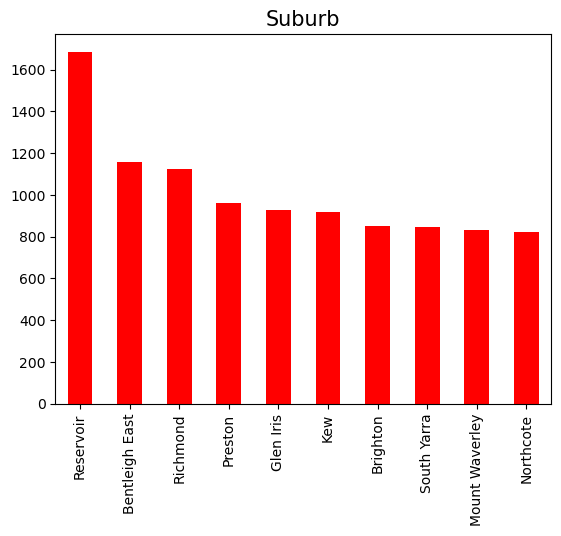

In [27]:
# Displaying in form of graph

df["Suburb"].value_counts().nlargest(10).plot(kind = "bar",cmap='flag')
plt.title('Suburb',fontsize=15)
plt.show()

    From these visuals we can say that Reservoir has maximum no of houses (1685) followed by Bentleigh East(1159) and so on

#### For Address :-

In [28]:
# checking unique values

df["Address"].nunique()

57754

In [29]:
print("Total no of house counts for top 10 Address :")

df["Address"].value_counts().nlargest(10).to_frame().style.background_gradient(cmap='copper')

Total no of house counts for top 10 Address :


,Address
5 Charles St,11
3 Parker St,8
14 Northcote St,8
3 Donald St,8
57 Bay Rd,7
2 Bruce St,7
56 Victoria St,7
11 Highview Rd,7
6 Belmont Av,7
39 York St,7


    5 Charles St has the maximum no of houses followed by 3 Parker St and so on

####  For Types :-

In [30]:
# checking unique values

df["Type"].nunique()

3

In [31]:
# Printing unique values

df["Type"].unique()

array(['h', 'u', 't'], dtype=object)

In [32]:
print("Total no of house counts for each type are :")

df["Type"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of house counts for each type are :


,Type
h,53917
u,15111
t,7848


    h - house,cottage,villa, semi,terrace has the maximum no of house(53917) followed by u - unit, duplex and t - townhouse

#### For Method :- 

In [33]:
# checking unique values

df["Method"].nunique()

9

In [34]:
# Printing unique values

df["Method"].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [35]:
print("Total no of house counts for each type are :")

df["Method"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of house counts for each type are :


,Method
S,42230
PI,11631
SP,10877
VB,7034
SN,3248
PN,770
W,534
SA,467
SS,85


    S - property sold has the maximum no of houses followed by PI - property passed in, SP - property sold prior and so on

#### For  SellerG (Real Estate Agent)  :-

In [36]:
# checking unique values

df["SellerG"].nunique()

476

In [37]:
print("Top 10 SellerG are :")

df["SellerG"].value_counts().nlargest(10).to_frame().style.background_gradient(cmap='copper')

Top 10 SellerG are :


,SellerG
Barry,7880
Jellis,6941
Nelson,6308
hockingstuart,5582
Ray,5071
Buxton,4115
Marshall,3844
Biggin,1982
Fletchers,1928
Woodards,1495


    Barry has sold the maximum no of houses(7880) followed by Jellis and so on

#### For CouncilArea (Governing council for the area) :- 

In [38]:
# checking unique values

df["CouncilArea"].nunique()

34

In [39]:
print("Top 10 CouncleArea with most no of houses :")

df["CouncilArea"].value_counts().nlargest(10).to_frame().style.background_gradient(cmap='copper')

Top 10 CouncleArea with most no of houses :


,CouncilArea
Boroondara City Council,7099
Darebin City Council,5686
Banyule City Council,4325
Bayside City Council,4022
Glen Eira City Council,4010
Monash City Council,3978
Moreland City Council,3920
Brimbank City Council,3828
Melbourne City Council,3821
Moonee Valley City Council,3465


    From this stats we can see that Boroondara City Council has most no of houses (7099) followed by Darebin City Council(5686) and so on

#### For Regionname(General Region) :- 

In [40]:
# checking unique values

df["Regionname"].nunique()

8

In [41]:
# displaying Regionname

df["Regionname"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [42]:
print("Regions with total no of houses :")

df["Regionname"].value_counts().to_frame().style.background_gradient(cmap='copper')

Regions with total no of houses :


,Regionname
Southern Metropolitan,23607
Northern Metropolitan,20604
Western Metropolitan,14543
Eastern Metropolitan,11478
South-Eastern Metropolitan,5286
Eastern Victoria,564
Northern Victoria,556
Western Victoria,238


    From this stats we can see that Southern Metropolitan Region has most no of houses(23607) followed by Northern Metropolitan(20603) and so on

### Univariate analysis For Numerical Features 

In [43]:
# getting description about the numerical features

df.describe()

,Rooms,Price,Distance,Postcode,Propertycount
count,76876.000000,7.687600e+04,76876.000000,76876.000000,76876.000000
mean,3.072897,1.012202e+06,11.966968,3120.769473,7582.995226
std,0.966317,5.325147e+05,7.203723,117.026530,4425.730038
min,1.000000,8.500000e+04,0.000000,3000.000000,39.000000
25%,2.000000,6.800000e+05,6.700000,3054.000000,4380.000000
50%,3.000000,1.012202e+06,10.800000,3104.000000,6763.000000
75%,4.000000,1.100000e+06,15.400000,3163.000000,10412.000000
max,31.000000,1.120000e+07,64.100000,3980.000000,21650.000000


#### For Rooms :- 

<AxesSubplot:xlabel='Rooms', ylabel='Density'>

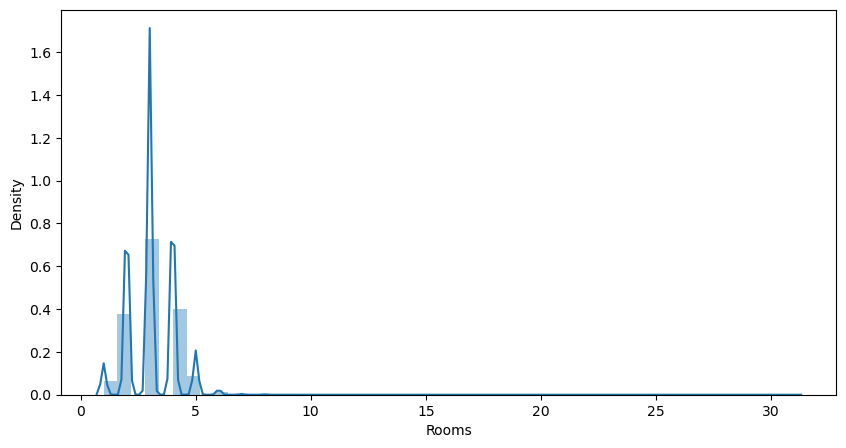

In [44]:
#checking the distribution of data

plt.figure(figsize = (10,5))
sns.distplot(df['Rooms'])

<AxesSubplot:>

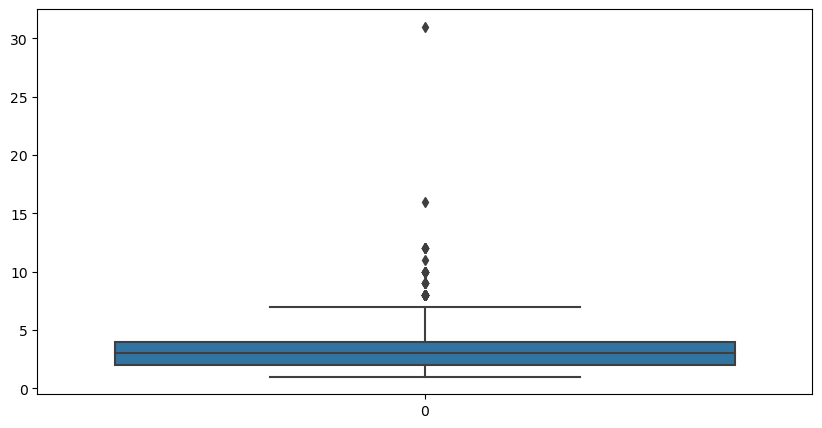

In [45]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['Rooms'])

    From this visual we can see that there is outlaies present

In [46]:
## calculating inter quantile range
Q3 = df.Rooms.quantile(0.75)
Q1 = df.Rooms.quantile(0.25)
IQR = Q3 - Q1
IQR

2.0

In [47]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['Rooms']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['Rooms']<=lower)
print("Lower Bound:",lower)


Upper Bound: 7.0
Lower Bound: -1.0


In [48]:
# Replacing outliers with null values

df['Rooms'] = np.where(df['Rooms']>=7, np.nan, df['Rooms'])

In [49]:
df['Rooms'].isnull().sum()

137

#### For Price :- 

<AxesSubplot:xlabel='Price', ylabel='Density'>

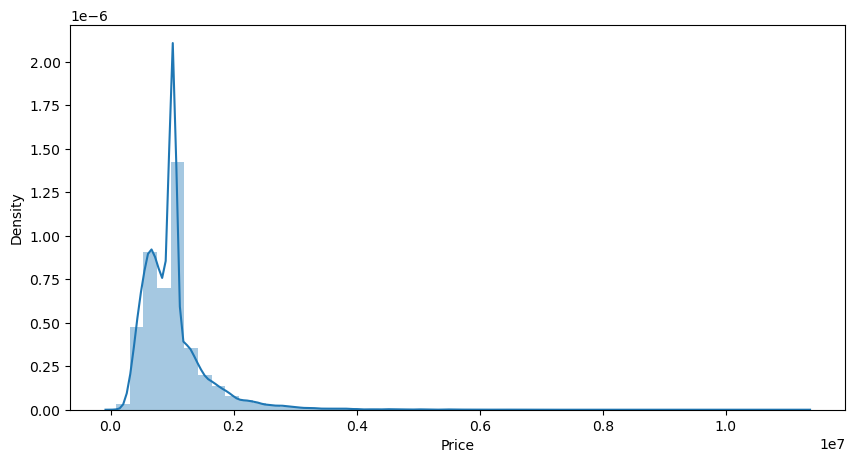

In [50]:
#checking the distribution

plt.figure(figsize = (10,5))
sns.distplot(df['Price'])

<AxesSubplot:>

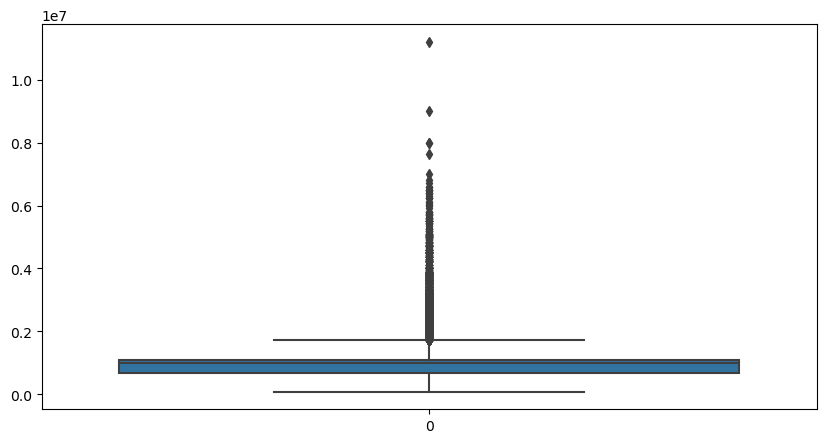

In [51]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['Price'])

    From this visual we can see that there is outlaies present

In [52]:
## calculating inter quantile range
Q3 = df.Price.quantile(0.75)
Q1 = df.Price.quantile(0.25)
IQR = Q3 - Q1
IQR

420000.0

In [53]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['Price']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['Price']<=lower)
print("Lower Bound:",lower)

Upper Bound: 1730000.0
Lower Bound: 50000.0


In [54]:
# Replacing outliers with null values

df['Price'] = np.where(df['Price']>=1730000, np.nan, df['Price'])

In [55]:
df['Price'] = np.where(df['Price']<=50000, np.nan, df['Price'])

In [56]:
df['Price'].isnull().sum()

5876

In [57]:
# Filling Null values with Mean values

mean=df['Price'].mean()
df['Price'].fillna(value=mean, inplace=True)

In [58]:
df['Price'].isnull().sum()

0

#### For Distance :- 

<AxesSubplot:xlabel='Distance', ylabel='Density'>

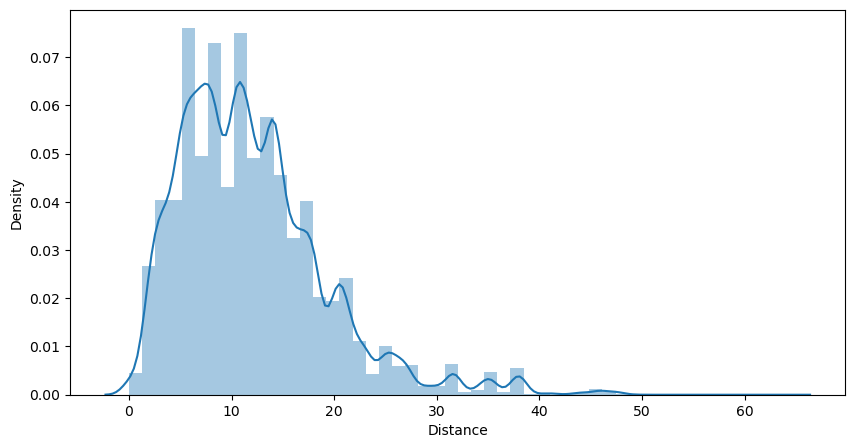

In [59]:
#checking the distribution

plt.figure(figsize = (10,5))
sns.distplot(df['Distance'])

<AxesSubplot:>

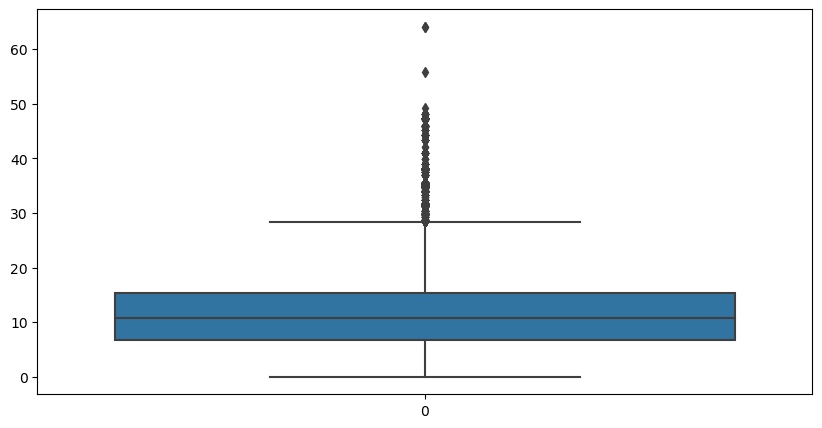

In [60]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['Distance'])

    From this visual we can see that there is outlaies present

In [61]:
## calculating inter quantile range
Q3 = df.Distance.quantile(0.75)
Q1 = df.Distance.quantile(0.25)
IQR = Q3 - Q1
IQR

8.7

In [62]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['Distance']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['Distance']<=lower)
print("Lower Bound:",lower)

Upper Bound: 28.45
Lower Bound: -6.349999999999999


In [63]:
# Replacing outliers with null values

df['Distance'] = np.where(df['Distance']>=28.5, np.nan, df['Distance'])

In [64]:
df['Distance'].isnull().sum()

2465

#### For Postcode :-

<AxesSubplot:xlabel='Postcode', ylabel='Density'>

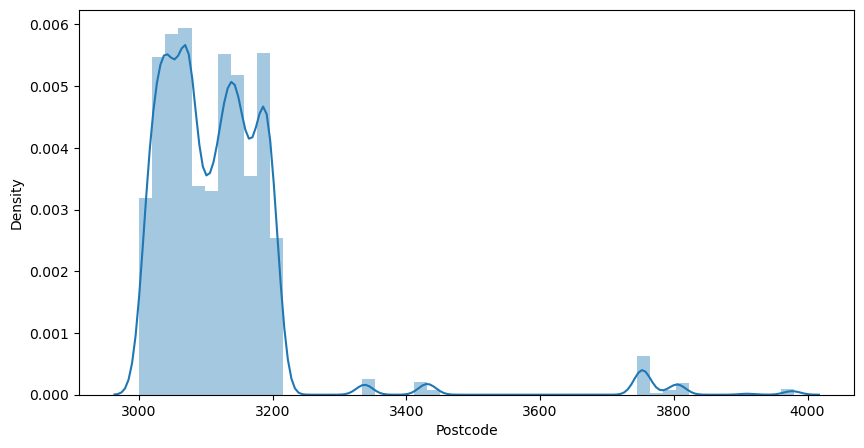

In [65]:
#checking the distribution

plt.figure(figsize = (10,5))
sns.distplot(df['Postcode'])

<AxesSubplot:>

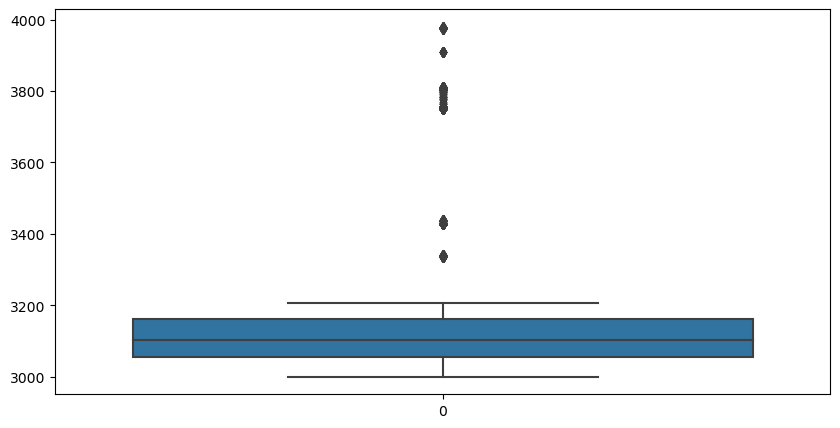

In [66]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['Postcode'])

    From this visual we can see that there is outlaies present

In [67]:
## calculating inter quantile range
Q3 = df.Postcode.quantile(0.75)
Q1 = df.Postcode.quantile(0.25)
IQR = Q3 - Q1
IQR

109.0

In [68]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['Postcode']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['Postcode']<=lower)
print("Lower Bound:",lower)

Upper Bound: 3326.5
Lower Bound: 2890.5


In [69]:
# Replacing outliers with null values

df['Postcode'] = np.where(df['Postcode']>3326, np.nan, df['Postcode'])

In [70]:
df['Postcode'].isnull().sum()

2382

#### For Propertycount :- 

<AxesSubplot:xlabel='Propertycount', ylabel='Density'>

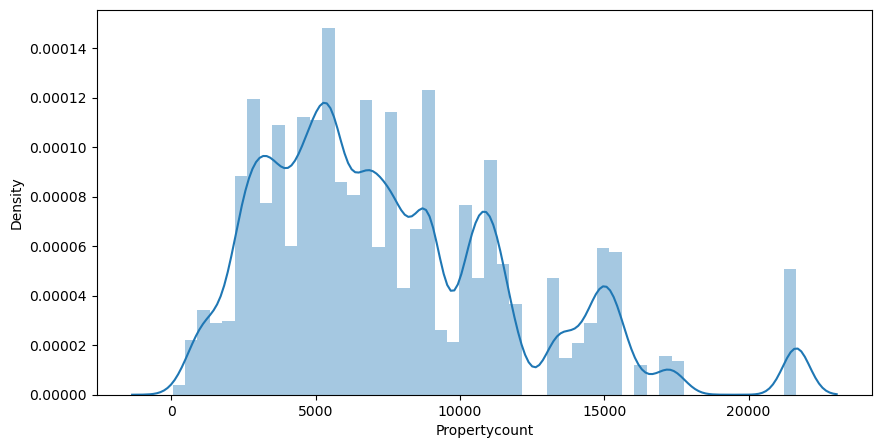

In [71]:
#checking the distribution

plt.figure(figsize = (10,5))
sns.distplot(df['Propertycount'])

<AxesSubplot:>

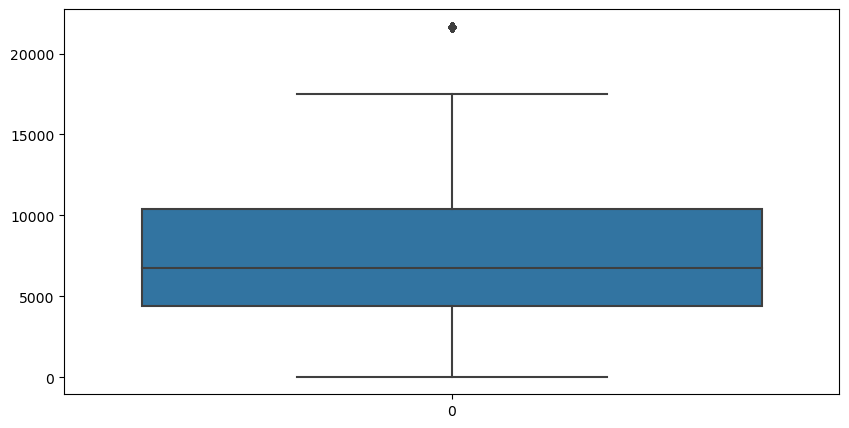

In [72]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['Propertycount'])

In [73]:
## calculating inter quantile range
Q3 = df.Propertycount.quantile(0.75)
Q1 = df.Propertycount.quantile(0.25)
IQR = Q3 - Q1
IQR

6032.0

In [74]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['Propertycount']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['Propertycount']<=lower)
print("Lower Bound:",lower)

Upper Bound: 19460.0
Lower Bound: -4668.0


In [75]:
# Replacing outliers with null values

df['Propertycount'] = np.where(df['Propertycount']>19460, np.nan, df['Propertycount'])

In [76]:
df['Propertycount'].isnull().sum()

1685

#### Cleaning null values :- 

In [77]:
df.isnull().sum()

Suburb              0
Address             0
Rooms             137
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance         2465
Postcode         2382
CouncilArea         0
Regionname          0
Propertycount    1685
dtype: int64

    There are still some null values are present because i have converted the outliers into null values.
    
    So now we will clean this null value

In [78]:
# dropping rows with null values

df = df.dropna(subset=['Rooms', 'Postcode','Distance','Propertycount'])

In [79]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

Now the data is clean as i have removed null values and outliers

## EDA

In [80]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2.0,h,1.012202e+06,SS,Jellis,3/09/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2.0,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2.0,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3.0,u,1.012202e+06,VB,Rounds,4/02/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3.0,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0


#### Checking Correlation 

In [81]:
df.corr()

,Rooms,Price,Distance,Postcode,Propertycount
Rooms,1.000000,0.347591,0.309128,0.027063,-0.050870
Price,0.347591,1.000000,-0.105576,0.222380,-0.027557
Distance,0.309128,-0.105576,1.000000,0.216212,-0.054539
Postcode,0.027063,0.222380,0.216212,1.000000,0.056628
Propertycount,-0.050870,-0.027557,-0.054539,0.056628,1.000000


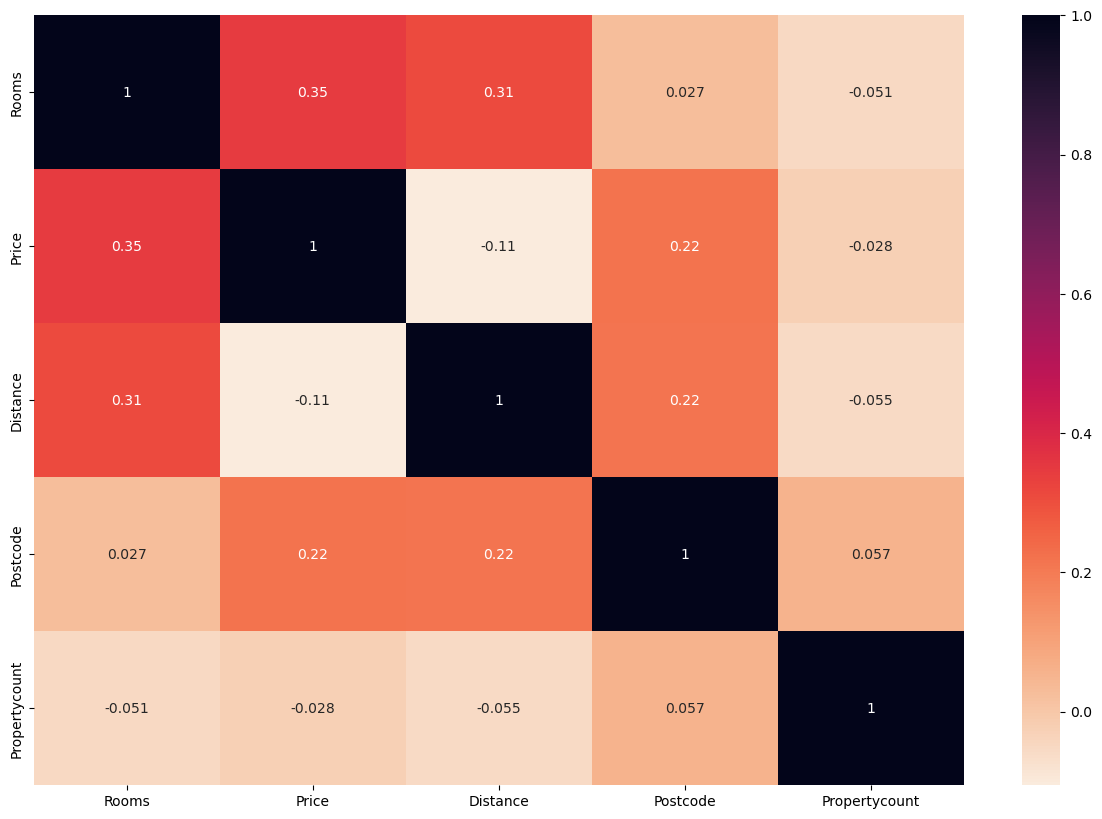

In [82]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="rocket_r")
plt.show()

    We can clearly see that none of the feature are correlated to each other

#### 1. Which Suburb has maximum Price?

<AxesSubplot:ylabel='Suburb'>

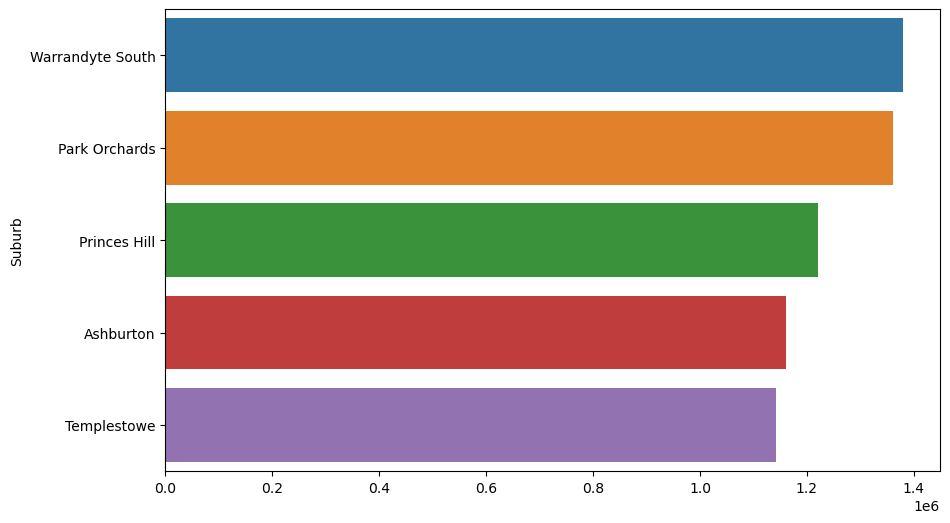

In [83]:
a=df.groupby('Suburb')['Price'].mean()
sorted_a=a.sort_values(ascending=False).head(5)

plt.figure(figsize=[10,6])
sns.barplot(y=sorted_a.index,x=sorted_a.values)

    From this visual we can say that Warrandyte South Has maximum Price For houses

#### 2.Which house type has maximum price? 

<AxesSubplot:ylabel='Type'>

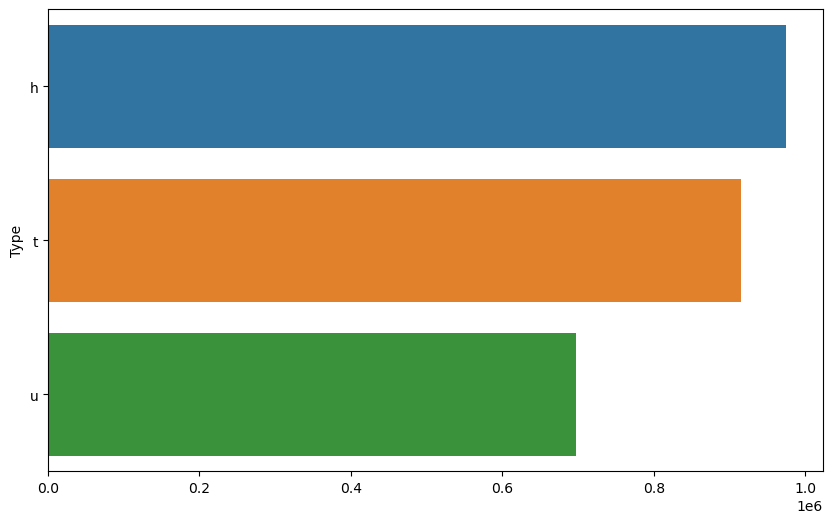

In [84]:
a=df.groupby('Type')['Price'].mean()
sorted_a=a.sort_values(ascending=False).head(5)

plt.figure(figsize=[10,6])
sns.barplot(y=sorted_a.index,x=sorted_a.values)

h - (house,cottage,villa, semi,terrace) has the maximum price.

#### 3. Area with higest no or rooms house 

<AxesSubplot:ylabel='Suburb'>

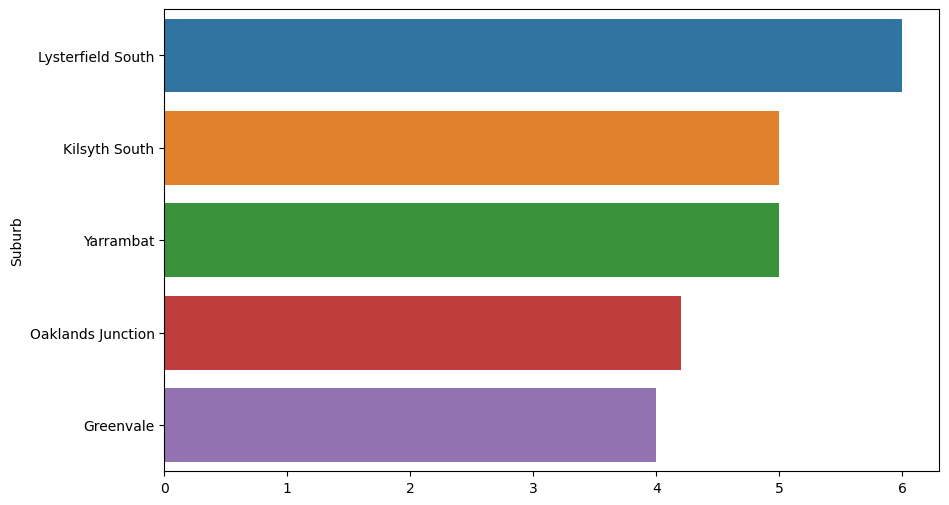

In [85]:
a=df.groupby('Suburb')['Rooms'].mean()
sorted_a=a.sort_values(ascending=False).head(5)

plt.figure(figsize=[10,6])
sns.barplot(y=sorted_a.index,x=sorted_a.values)

    Lysternfield has higest no of rooms in single house which is 6

#### 4. Which seller has sold the most expensive house? 

<AxesSubplot:ylabel='SellerG'>

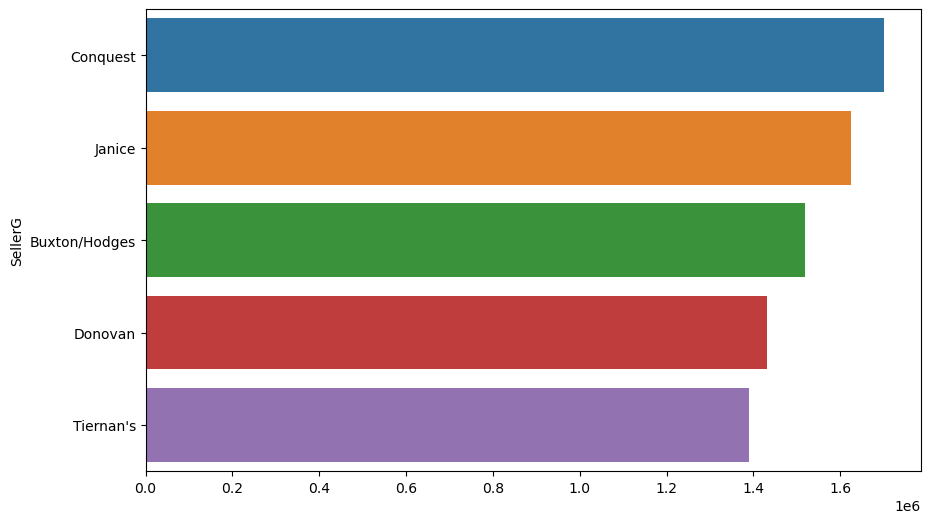

In [86]:
a=df.groupby('SellerG')['Price'].mean()
sorted_a=a.sort_values(ascending=False).head(5)

plt.figure(figsize=[10,6])
sns.barplot(y=sorted_a.index,x=sorted_a.values)

    Conquest Has sold the most expensive house.

#### 5. Which Regionname has expencive house ? 

<AxesSubplot:ylabel='Regionname'>

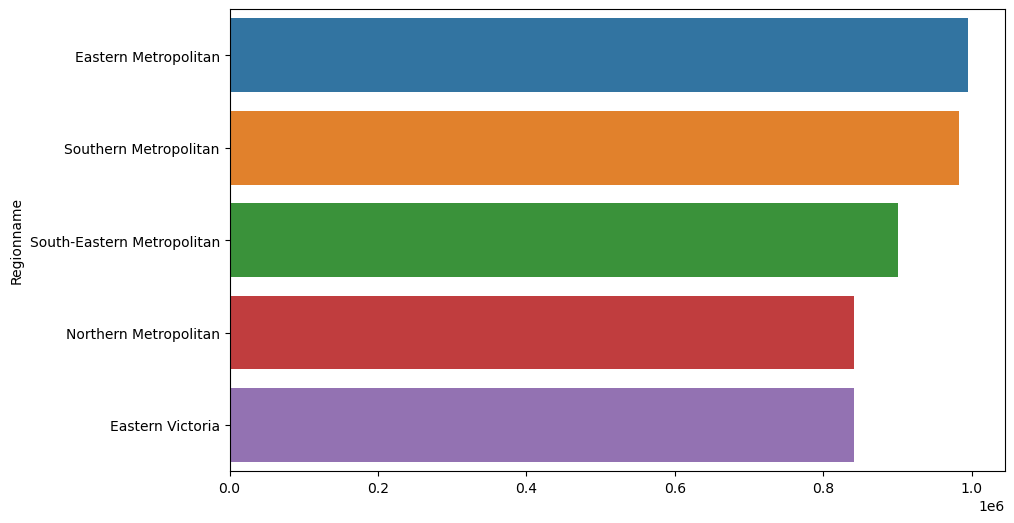

In [87]:
a=df.groupby('Regionname')['Price'].mean()
sorted_a=a.sort_values(ascending=False).head(5)

plt.figure(figsize=[10,6])
sns.barplot(y=sorted_a.index,x=sorted_a.values)

    Eastern Metropolitan has most expensive house

## Feature Enginearing 

In [88]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
7404,Northcote,52 Charles St,2.0,h,1.211000e+06,S,Jellis,24/09/2016,5.5,3070.0,Darebin City Council,Northern Metropolitan,11364.0
1481,Bentleigh East,21 Highview Rd,2.0,h,7.220000e+05,S,Buxton,16/04/2016,13.9,3165.0,Glen Eira City Council,Southern Metropolitan,10969.0
47059,Mitcham,9 Garden Av,4.0,h,1.575000e+06,S,Noel,10/09/2016,17.2,3132.0,Whitehorse City Council,Eastern Metropolitan,6871.0
73241,Northcote,4 Clifton St,5.0,h,8.986816e+05,SP,hockingstuart,28/05/2016,5.3,3070.0,Darebin City Council,Northern Metropolitan,11364.0
28507,Carlton,167 Station St,2.0,h,1.012202e+06,SP,Ray,25/11/2017,1.6,3053.0,Melbourne City Council,Northern Metropolitan,6786.0


In [89]:
df = df.drop(['Address','Date','Suburb','SellerG'],axis=1)

In [90]:
df.shape

(71652, 9)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71652 entries, 0 to 76882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          71652 non-null  float64
 1   Type           71652 non-null  object 
 2   Price          71652 non-null  float64
 3   Method         71652 non-null  object 
 4   Distance       71652 non-null  float64
 5   Postcode       71652 non-null  float64
 6   CouncilArea    71652 non-null  object 
 7   Regionname     71652 non-null  object 
 8   Propertycount  71652 non-null  float64
dtypes: float64(5), object(4)
memory usage: 5.5+ MB


In [92]:
df.Type.nunique()

3

In [93]:
df.Method.nunique()

9

In [94]:
df.CouncilArea.nunique()

28

In [95]:
df.Regionname.nunique()

7

### Encoding categorical features to numerical

In [96]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.

df['Type']= label_encoder.fit_transform(df['Type'])

# Encoding labels in Method.

df['Method']= label_encoder.fit_transform(df['Method'])

# Encoding labels in CouncilArea.

df['CouncilArea']= label_encoder.fit_transform(df['CouncilArea'])

# Encoding labels in Regionname.

df['Regionname']= label_encoder.fit_transform(df['Regionname'])

In [97]:
df.head()

,Rooms,Type,Price,Method,Distance,Postcode,CouncilArea,Regionname,Propertycount
0,2.0,0,1.012202e+06,6,2.5,3067.0,26,2,4019.0
1,2.0,0,1.480000e+06,2,2.5,3067.0,26,2,4019.0
2,2.0,0,1.035000e+06,2,2.5,3067.0,26,2,4019.0
3,3.0,2,1.012202e+06,7,2.5,3067.0,26,2,4019.0
4,3.0,0,1.465000e+06,5,2.5,3067.0,26,2,4019.0


In [98]:
df.dtypes

Rooms            float64
Type               int64
Price            float64
Method             int64
Distance         float64
Postcode         float64
CouncilArea        int64
Regionname         int64
Propertycount    float64
dtype: object

In [99]:
# Converting datatype from float to int

df = df.astype({"Rooms":'int', "Price":'int',"Postcode":'int',"Propertycount":'int'}) 

In [100]:
df.dtypes

Rooms              int64
Type               int64
Price              int64
Method             int64
Distance         float64
Postcode           int64
CouncilArea        int64
Regionname         int64
Propertycount      int64
dtype: object

In [101]:
df.to_csv('./clean_house_prediction.csv')

## Model Building 

### Splitting Dataset 

In [102]:
# Splitting the data into X,y
X = df.drop("Price",axis = 1)
Y = df["Price"].values.reshape(-1,1)

In [103]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train, X_test,Y_train, Y_test = train_test_split(X,Y ,random_state=104, test_size=0.25, shuffle=True)

In [104]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

### Model Deployment 

In [105]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


In [106]:
def get_accuracy(model_name):
    model         = model_name
    model.fit(X_train,Y_train)
    Y_pred_train  = model.predict(X_train)
    mse_train     = mean_squared_error(Y_train,Y_pred_train)
    mae_train     = mean_absolute_error(Y_train,Y_pred_train)
    r2score_train = r2_score(Y_train,Y_pred_train)*100
    
    Y_pred_test   = model.predict(X_test)
    mse_test      = mean_squared_error(Y_test,Y_pred_test)
    mae_test      = mean_absolute_error(Y_test,Y_pred_test)
    r2score_test = r2_score(Y_test,Y_pred_test)*100
    
    return print(f"mse_train {mse_train} \nmae_train {mae_train} \nr2score_train {r2score_train} \nmse_test {mse_test} \nmae_test {mae_test} \nr2score_test {r2score_test}")

In [107]:
for model_name,model in [("LinearRegression",LinearRegression()),("DecisionTreeRegressor",DecisionTreeRegressor()),("RandomForestRegressor",RandomForestRegressor()),("XGBRegressor",XGBRegressor()),("AdaBoostRegressor",AdaBoostRegressor()),("GradientBoostingRegressor",GradientBoostingRegressor())]:
    print(model_name)
    print(get_accuracy(model))
    print("*"*100)

LinearRegression
mse_train 56309788719.77774 
mae_train 190292.61142642514 
r2score_train 32.84794998341465 
mse_test 56695832636.87382 
mae_test 191231.41491712225 
r2score_test 32.23991611856199
None
****************************************************************************************************
DecisionTreeRegressor
mse_train 29076228670.60793 
mae_train 120221.37087662096 
r2score_train 65.32524084402135 
mse_test 44494831448.23335 
mae_test 152020.64145686777 
r2score_test 46.82195549480546
None
****************************************************************************************************
RandomForestRegressor
mse_train 29546645805.38215 
mae_train 124694.21856454702 
r2score_train 64.76424646486961 
mse_test 41595010817.41814 
mae_test 149726.8885121393 
r2score_test 50.28767916524978
None
****************************************************************************************************
XGBRegressor
mse_train 34082339023.361137 
mae_train 139762.250273021 
r2score_tra